#Carga de datos y librerias


In [1]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split

#Biblioteca de Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,model_from_json
from keras.layers import Dropout, LSTM, Dense, Activation,Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, TimeSeriesSplit
import time


In [2]:
pip install scikit-posthocs --quiet

In [3]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [4]:
cd /content/gdrive/MyDrive/Tesis/Datos

/content/gdrive/MyDrive/Tesis/Datos


#Analsisis de Error de cada modelo

In [5]:
Narmax_result_mlp=pd.read_csv('Narmax_results_MLP_Wallmart.csv',index_col=0)
Narmax_result_gru=pd.read_csv('Narmax_results_GRU_Wallmart.csv',index_col=0)
Narmax_result_lstm=pd.read_csv('results_LSTM_Wallmart.csv',index_col=0)
Narmax_result_cnn=pd.read_csv('Narmax_results_CNN_Wallmart.csv',index_col=0)
Narmax_result_transformer=pd.read_csv('Narmax_results_Transformer_Wallmart.csv',index_col=0)
Narmax_result_svr=pd.read_csv('Narmax_results_SVR_Wallmart.csv',index_col=0)
Narmax_result_elm=pd.read_csv('Narmax_results_ELM_Wallmart.csv',index_col=0)

In [6]:
print(Narmax_result_mlp.shape)
print(Narmax_result_gru.shape)
print(Narmax_result_lstm.shape)
print(Narmax_result_cnn.shape)
print(Narmax_result_transformer.shape)
print(Narmax_result_svr.shape)
print(Narmax_result_elm.shape)

(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)
(250, 8)


##ELM

In [7]:
Narmax_result_elm = Narmax_result_elm.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_elm.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
119,ELM_sigm_64.0,24,5,0.008440,0.759591,4.789837,0.871545,0.651224
109,ELM_sigm_32.0,22,5,0.002949,0.807922,2.430696,0.898845,0.674286
113,ELM_sigm_32.0,23,4,0.002595,0.836543,3.998856,0.914627,0.678753
111,ELM_sigm_32.0,23,2,0.001105,0.874208,2.389447,0.934991,0.720544
92,ELM_tanh_32.0,19,3,0.021940,0.889609,2.369387,0.943191,0.714121


In [ ]:
print(Narmax_result_elm["time"].mean())
print(Narmax_result_elm["MSE"].mean())

0.039002226829528766
1792062383.4738457


##SVR

In [ ]:
Narmax_result_svr = Narmax_result_svr.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_svr.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
144,SVR_Wallmart_29_5_linear_1_0.2_auto,29,5,2.730910,0.445496,2.054747,0.667455,0.481996
149,SVR_Wallmart_30_5_linear_1_0.2_auto,30,5,2.757076,0.445496,2.054747,0.667455,0.481996
164,SVR_Wallmart_33_5_linear_1_0.2_auto,33,5,2.732210,0.445496,2.054747,0.667455,0.481996
174,SVR_Wallmart_35_5_linear_1_0.2_auto,35,5,2.730505,0.445496,2.054747,0.667455,0.481996
199,SVR_Wallmart_40_5_linear_1_0.2_auto,40,5,2.733136,0.445496,2.054747,0.667455,0.481996


In [ ]:
print(Narmax_result_svr["time"].mean())
print(Narmax_result_svr["MSE"].mean())

0.4935282974243164
14.112021895979629


##MLP

In [ ]:
Narmax_result_mlp = Narmax_result_mlp.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_mlp.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
234,MLP_Wallmart_47_5_800_50.0_1.0_192.0_0.45_adam...,47,5,35.658413,0.473573,0.688166,0.512811,173.433792
44,MLP_Wallmart_9_5_800_40.0_2.0_480.0_0.54_adam_...,9,5,47.038402,0.474728,0.689005,0.516164,176.453079
84,MLP_Wallmart_17_5_800_30.0_1.0_96.0_0.54_adam_...,17,5,119.476482,0.475598,0.689636,0.516714,180.814850
9,MLP_Wallmart_2_5_800_60.0_1.0_64.0_0.55_adam_3...,2,5,98.472659,0.477715,0.691169,0.519830,173.157806
49,MLP_Wallmart_10_5_800_60.0_1.0_448.0_0.46_adam...,10,5,28.136596,0.478909,0.692033,0.524919,187.875107


In [ ]:
print(Narmax_result_mlp["time"].mean())
print(Narmax_result_mlp["MSE"].mean())

30.742303555488586
0.8580095062255859


##GRU

In [ ]:
Narmax_result_gru = Narmax_result_gru.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_gru.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
104,GRU_Wallmart_21_5_800_10.0_3.0_360.0_0.7_adam_...,21,5,214.149539,0.456498,0.675646,0.492126,194.549881
134,GRU_Wallmart_27_5_800_100.0_3.0_320.0_0.55_ada...,27,5,42.033451,0.464447,0.681503,0.500632,190.808731
119,GRU_Wallmart_24_5_800_20.0_3.0_420.0_0.59_adam...,24,5,82.952432,0.464662,0.681661,0.499837,193.489426
79,GRU_Wallmart_16_5_800_50.0_2.0_400.0_0.52_adam...,16,5,36.830282,0.465196,0.682053,0.499571,184.593735
234,GRU_Wallmart_47_5_800_90.0_2.0_260.0_0.58_adam...,47,5,35.925428,0.467111,0.683455,0.504095,186.818695


In [ ]:
print(Narmax_result_gru["time"].mean())
print(Narmax_result_gru["MSE"].mean())

45.56987223625183
0.5763914357423783


##LSTM

In [ ]:
Narmax_result_lstm = Narmax_result_lstm.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_lstm.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
14,LSTM_Wallmart_3_5_800_30.0_2.0_352.0_0.43_adam...,3,5,138.101536,0.438978,0.662554,0.487419,228.010025
84,LSTM_Wallmart_17_5_800_30.0_3.0_448.0_0.42_ada...,17,5,233.119091,0.439021,0.662587,0.483972,232.810699
179,LSTM_Wallmart_36_5_800_20.0_2.0_288.0_0.6_adam...,36,5,307.499170,0.439200,0.662722,0.484254,218.693298
74,LSTM_Wallmart_15_5_800_70.0_3.0_512.0_0.5_adam...,15,5,182.062378,0.439808,0.663180,0.481646,211.900406
194,LSTM_Wallmart_39_5_800_40.0_2.0_288.0_0.59_ada...,39,5,228.578541,0.440231,0.663499,0.484051,209.963104


##CNN

In [ ]:
Narmax_result_cnn= Narmax_result_cnn.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_cnn.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
244,CNN_Wallmart_49_5_800_70.0_1.0_600.0_0.51_adam...,49,5,24.294567,0.505385,0.710904,0.540790,223.949005
89,CNN_Wallmart_18_5_800_50.0_1.0_200.0_0.55_adam...,18,5,22.325629,0.511323,0.715068,0.542675,221.989761
54,CNN_Wallmart_11_5_800_20.0_1.0_600.0_0.47_adam...,11,5,32.860205,0.512074,0.715594,0.545078,238.992401
218,CNN_Wallmart_44_4_800_100.0_2.0_800.0_0.48_ada...,44,4,27.067214,0.515072,0.717685,0.526251,198.767654
34,CNN_Wallmart_7_5_800_20.0_1.0_300.0_0.42_adam_...,7,5,46.262059,0.519170,0.720535,0.550608,241.812531


In [ ]:
print(Narmax_result_cnn["time"].mean())
print(Narmax_result_cnn["MSE"].mean())

20.120987710952758
0.6157380876541138


##Transformer

In [ ]:
Narmax_result_transformer= Narmax_result_transformer.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
Narmax_result_transformer.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
172,Transformer_Wallmart_35_3_800_20.0_256.0_8.0_0...,35,3,248.451145,0.462994,0.680436,0.505869,187.493332
143,Transformer_Wallmart_29_4_800_40.0_128.0_7.0_0...,29,4,171.014874,0.469810,0.685427,0.517316,202.082199
17,Transformer_Wallmart_4_3_800_10.0_256.0_7.0_0....,4,3,460.828202,0.477908,0.691309,0.510906,201.069534
152,Transformer_Wallmart_31_3_800_20.0_96.0_7.0_0....,31,3,248.921013,0.482110,0.694341,0.523545,212.977966
178,Transformer_Wallmart_36_4_800_10.0_96.0_8.0_0....,36,4,298.431125,0.483665,0.695460,0.510977,192.902740


In [ ]:
print(Narmax_result_transformer["time"].mean())
print(Narmax_result_transformer["MSE"].mean())

83.61282446956635
51.36304826521874


#Se verifica normalidad de los errores de test

In [ ]:
from scipy.stats import shapiro
import numpy as np
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi
import scikit_posthocs as sp

In [ ]:
def test_shapiro(data):
  stat, p = shapiro(data)
  print('stat=%.3f, p=%.5f' % (stat, p))
  if p > 0.05:
    print('Probably Gaussian')
    print("")
  else:
    print('Probably not Gaussian')
    print("")

In [ ]:
print("Test de shapiro a Resutl MLP")
test_shapiro(Narmax_result_mlp["MSE"])

print("Test de shapiro a Resutl ELM")
test_shapiro(Narmax_result_elm["MSE"])

print("Test de shapiro a Resutl SVR")
test_shapiro(Narmax_result_svr["MSE"])

print("Test de shapiro a Resutl GRU")
test_shapiro(Narmax_result_gru["MSE"])

print("Test de shapiro a Resutl LSTM")
test_shapiro(Narmax_result_lstm["MSE"])

print("Test de shapiro a Resutl CNN")
test_shapiro(Narmax_result_cnn["MSE"])

print("Test de shapiro a Resutl transformer")
test_shapiro(Narmax_result_transformer["MSE"])

Test de shapiro a Resutl MLP
stat=0.295, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl ELM
stat=0.229, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl SVR
stat=0.201, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl GRU
stat=0.686, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl LSTM
stat=0.700, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl CNN
stat=0.845, p=0.00000
Probably not Gaussian

Test de shapiro a Resutl transformer
stat=0.539, p=0.00000
Probably not Gaussian



In [ ]:
def grafico_distribucion(data):
  plt.subplots(figsize=(7,3))
  sns.histplot(x=data,kde=True,color="blue",bins=30)
  plt.tight_layout()
  plt.show()

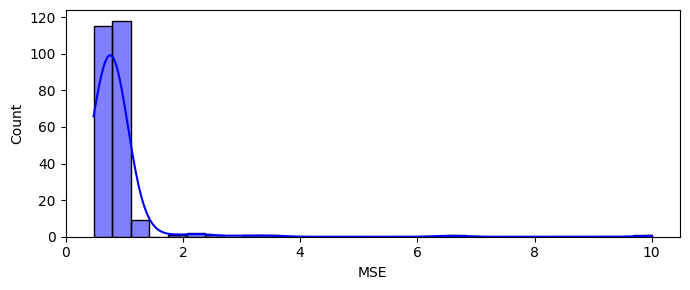

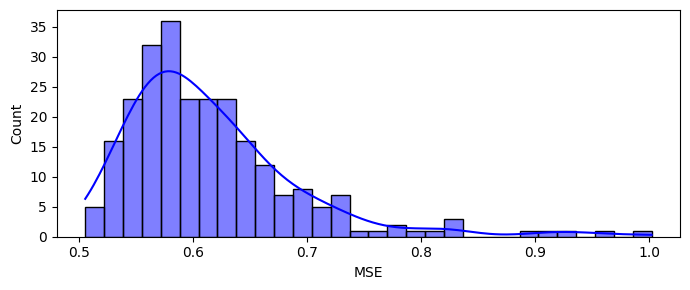

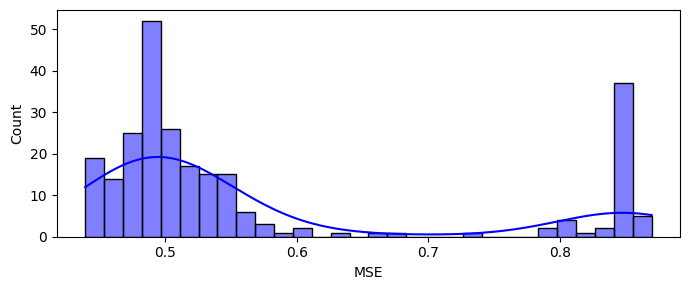

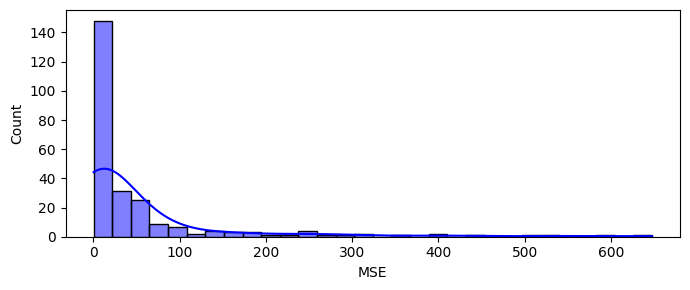

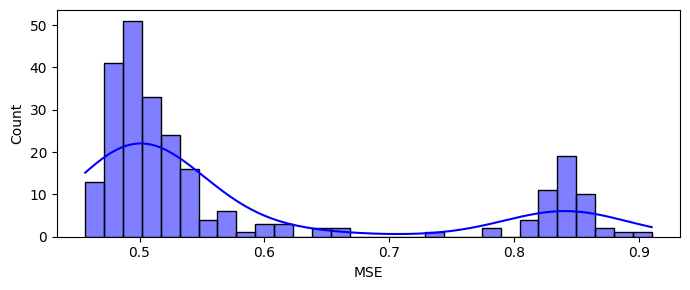

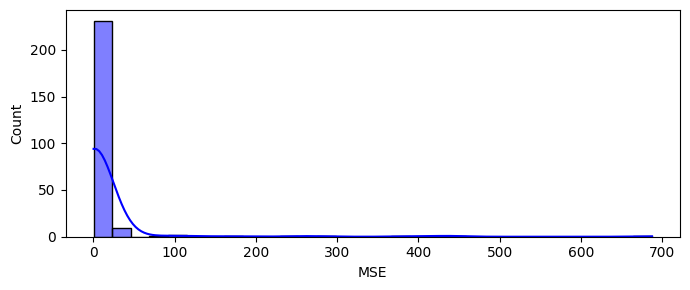

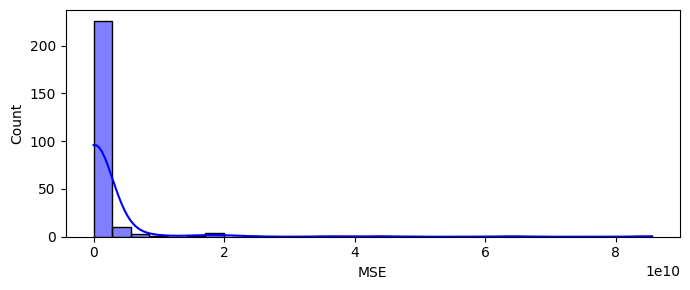

In [ ]:
grafico_distribucion(Narmax_result_mlp["MSE"])
grafico_distribucion(Narmax_result_cnn["MSE"])
grafico_distribucion(Narmax_result_lstm["MSE"])
grafico_distribucion(Narmax_result_transformer["MSE"])
grafico_distribucion(Narmax_result_gru["MSE"])
grafico_distribucion(Narmax_result_svr["MSE"])
grafico_distribucion(Narmax_result_elm["MSE"])

## Test de Friedman


In [ ]:
# Convertir los datos en un array 2D
data = np.array([Narmax_result_lstm["MSE"],Narmax_result_svr["MSE"],Narmax_result_elm["MSE"], Narmax_result_cnn["MSE"],Narmax_result_gru["MSE"],Narmax_result_mlp["MSE"],Narmax_result_transformer["MSE"]])
#data = np.array([result_lstm["MSE"], result_cnn["MSE"],result_gru["MSE"],result_mlp["MSE"],result_transformer["MSE"]])

# Realizar el test de Friedman
statistic, p_value = friedmanchisquare(*data)
print('stat=%.3f, p=%.3f' % (statistic, p_value))
nivel_significancia = 0.05
# Verificar si se rechaza o no la hipótesis nula
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")

stat=1168.665, p=0.000
Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


kruskal

In [ ]:
from scipy.stats import kruskal
# Convertir los datos en un array 2D
data = np.array([Narmax_result_lstm["MSE"],Narmax_result_svr["MSE"],Narmax_result_elm["MSE"], Narmax_result_cnn["MSE"],Narmax_result_gru["MSE"],Narmax_result_mlp["MSE"],Narmax_result_transformer["MSE"]])

# Realizar el test de Friedman
statistic, p_value = kruskal(*data)
print('stat=%.3f, p=%.3f' % (statistic, p_value))
nivel_significancia = 0.05
# Verificar si se rechaza o no la hipótesis nula
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")

stat=1014.456, p=0.000
Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


## post-hoc 1

In [ ]:
# Combinar los datos en un DataFrame
data_mse = pd.DataFrame({'LSTM':Narmax_result_lstm["MSE"],"SRV":Narmax_result_svr["MSE"], "ELM":Narmax_result_elm["MSE"], 'CNN':Narmax_result_cnn["MSE"], 'MLP': Narmax_result_mlp["MSE"],'GRU': Narmax_result_gru["MSE"],'Transformer':Narmax_result_transformer["MSE"]})
data_time = pd.DataFrame({'LSTM':Narmax_result_lstm["time"],"SRV":Narmax_result_svr["time"], "ELM":Narmax_result_elm["time"], 'CNN':Narmax_result_cnn["time"], 'MLP': Narmax_result_mlp["time"],'GRU': Narmax_result_gru["time"],'Transformer':Narmax_result_transformer["time"]})

kruskal

In [ ]:
from scipy.stats import kruskal
# Convertir los datos en un array 2D
data = np.array([Narmax_result_lstm["MSE"],Narmax_result_svr["MSE"],Narmax_result_elm["MSE"], Narmax_result_cnn["MSE"],Narmax_result_gru["MSE"],Narmax_result_mlp["MSE"],Narmax_result_transformer["MSE"]])

# Realizar el test de Friedman
statistic, p_value = kruskal(*data)
print('stat=%.3f, p=%.3f' % (statistic, p_value))
nivel_significancia = 0.05
# Verificar si se rechaza o no la hipótesis nula
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")

stat=1014.456, p=0.000
Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


In [ ]:
posthoc_df = sp.posthoc_mannwhitney([Narmax_result_lstm["MSE"],Narmax_result_svr["MSE"],Narmax_result_elm["MSE"],Narmax_result_cnn["MSE"],Narmax_result_mlp["MSE"],Narmax_result_gru["MSE"],Narmax_result_transformer["MSE"]], p_adjust = 'bonferroni')
group_names= ["LSTM", "SRV","ELM","CNN","MLP","GRU","Transformer"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
LSTM,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
SRV,1.000000,1.000000,0.000000,0.000001,0.000000,1.000000,0.000000
ELM,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
CNN,0.000000,0.000001,0.000000,1.000000,0.000000,0.000000,0.000000
MLP,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
GRU,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Transformer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
data_mse.describe()

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
count,250.000000,250.000000,2.500000e+02,250.000000,250.000000,250.000000,250.000000
mean,0.571634,14.112022,1.792062e+09,0.615738,0.858010,0.576391,51.363048
std,0.144076,68.225290,8.085274e+09,0.078017,0.763071,0.137401,101.013293
min,0.438978,0.445496,7.595909e-01,0.505385,0.473573,0.456498,0.462994
25%,0.483063,0.462136,1.524816e+02,0.565259,0.618093,0.488014,2.432948
50%,0.504246,0.504292,3.091270e+05,0.595728,0.798405,0.510809,10.421424
75%,0.558899,0.928927,1.044661e+08,0.643235,0.850858,0.569711,51.371202
max,0.869891,687.249610,8.559105e+10,1.002309,10.006952,0.910196,647.431335


In [ ]:
data_time.describe()

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,87.712153,0.493528,0.039002,20.120988,30.742304,45.569872,83.612824
std,89.179948,0.641002,0.041669,15.364569,34.377472,50.871450,100.046305
min,4.508127,0.005250,0.000377,3.971160,4.352473,3.888859,5.311800
25%,31.873508,0.064310,0.005919,9.971783,11.214974,20.678678,19.409249
50%,67.441616,0.258489,0.029298,15.232267,18.162531,32.883886,47.391034
75%,122.972435,0.584863,0.054135,23.655529,32.703263,53.635233,109.820041
max,871.156156,2.810764,0.234176,106.934808,242.799833,443.919067,575.917151


# Sección nueva

In [ ]:
result_mlp=pd.read_csv('results_MLP_Wallmart.csv',index_col=0)
result_gru=pd.read_csv('results_GRU_Wallmart.csv',index_col=0)
result_lstm=pd.read_csv('results_LSTM_Wallmart.csv',index_col=0)
result_cnn=pd.read_csv('results_CNN_Wallmart.csv',index_col=0)
result_transformer=pd.read_csv('results_Transformer_Wallmart.csv',index_col=0)
result_svr=pd.read_csv('results_SVR_Wallmart.csv',index_col=0)
result_elm=pd.read_csv('results_ELM_Wallmart.csv',index_col=0)

In [ ]:
pip install scipy --quiet

In [ ]:
from scipy.stats import ranksums,mannwhitneyu

CNN

In [ ]:
data_cnn_mse= np.array(result_cnn["MSE"])
data_cnn_mse_narmax= np.array(Narmax_result_cnn["MSE"])

In [ ]:
statistic, p_value = mannwhitneyu(data_cnn_mse,data_cnn_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


GRU

In [ ]:
data_gru_mse= np.array(result_gru["MSE"])
data_gru_mse_narmax= np.array(Narmax_result_gru["MSE"])

In [ ]:
statistic, p_value = mannwhitneyu(data_gru_mse,data_gru_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.


Transfomer

In [ ]:
data_transformer_mse= np.array(result_transformer["MSE"])
data_transformer_mse_narmax= np.array(Narmax_result_transformer["MSE"])

In [ ]:
statistic, p_value = mannwhitneyu(data_transformer_mse,data_transformer_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.


MLP

In [ ]:
data_mlp_mse= np.array(result_mlp["MSE"])
data_mlp_mse_narmax= np.array(Narmax_result_mlp["MSE"])

In [ ]:
statistic, p_value = mannwhitneyu(data_mlp_mse,data_mlp_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


SVR

In [ ]:
data_svr_mse= np.array(result_svr["MSE"])
data_svr_mse_narmax= np.array(Narmax_result_svr["MSE"])

In [ ]:
statistic, p_value = mannwhitneyu(data_svr_mse,data_svr_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


LSTM

In [ ]:
data_lstm_mse= np.array(result_lstm["MSE"])
data_lstm_mse_narmax= np.array(Narmax_result_lstm["MSE"])

In [ ]:
statistic, p_value = mannwhitneyu(data_lstm_mse,data_lstm_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.


ELM

In [ ]:
data_elm_mse= np.array(result_elm["MSE"])
data_elm_mse_narmax= np.array(Narmax_result_elm["MSE"])

In [ ]:
statistic, p_value = mannwhitneyu(data_elm_mse,data_elm_mse_narmax)
# Verificar si se rechaza o no la hipótesis nula
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")


No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.
